Kirill Komarov, Artur Kozubov 54 Dataset. 50%, 50%.

# Phase 3 - Mashine Learning

#### Libraries used

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Data loading

In [15]:
# Загрузка обработанных данных
train_data = pd.read_csv('train_data.csv')
train_mwra = pd.read_csv('train_mwra.csv')
test_data = pd.read_csv('test_data.csv')
test_mwra = pd.read_csv('test_mwra.csv')

# Проверим структуру данных
print(train_data.shape)
print(test_data.shape)
print(train_mwra.shape)
print(test_mwra.shape)


(10791, 30)
(4625, 30)
(10791, 1)
(4625, 1)


### 3.1 Simple classifier based on dependencies in the data

#### 3.1.A

In [ ]:
# Создание и обучение классификатора ID3 (ограничение глубины min 2)
id3_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
id3_classifier.fit(train_data, train_mwra)

#### 3.1.B

In [16]:
# Предсказание на тестовых данных
y_pred = id3_classifier.predict(test_data)

# Оценка классификатора
accuracy = accuracy_score(test_mwra, y_pred)
precision = precision_score(test_mwra, y_pred, average='binary')
recall = recall_score(test_mwra, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8921081081081081
Precision: 0.8923577235772358
Recall: 0.9423076923076923


#### 3.1.C

In [17]:
# Оценка на обучающей выборке
y_train_pred = id3_classifier.predict(train_data)

train_accuracy = accuracy_score(train_mwra, y_train_pred)
train_precision = precision_score(train_mwra, y_train_pred, average='binary')
train_recall = recall_score(train_mwra, y_train_pred, average='binary')

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)

# Если значения accuracy на обучающей выборке значительно выше, чем на тестовой, возможно, модель переобучена.


Training Accuracy: 0.9052914465758503
Training Precision: 0.9068516421291053
Training Recall: 0.9462333825701624


Vysualization of the tree

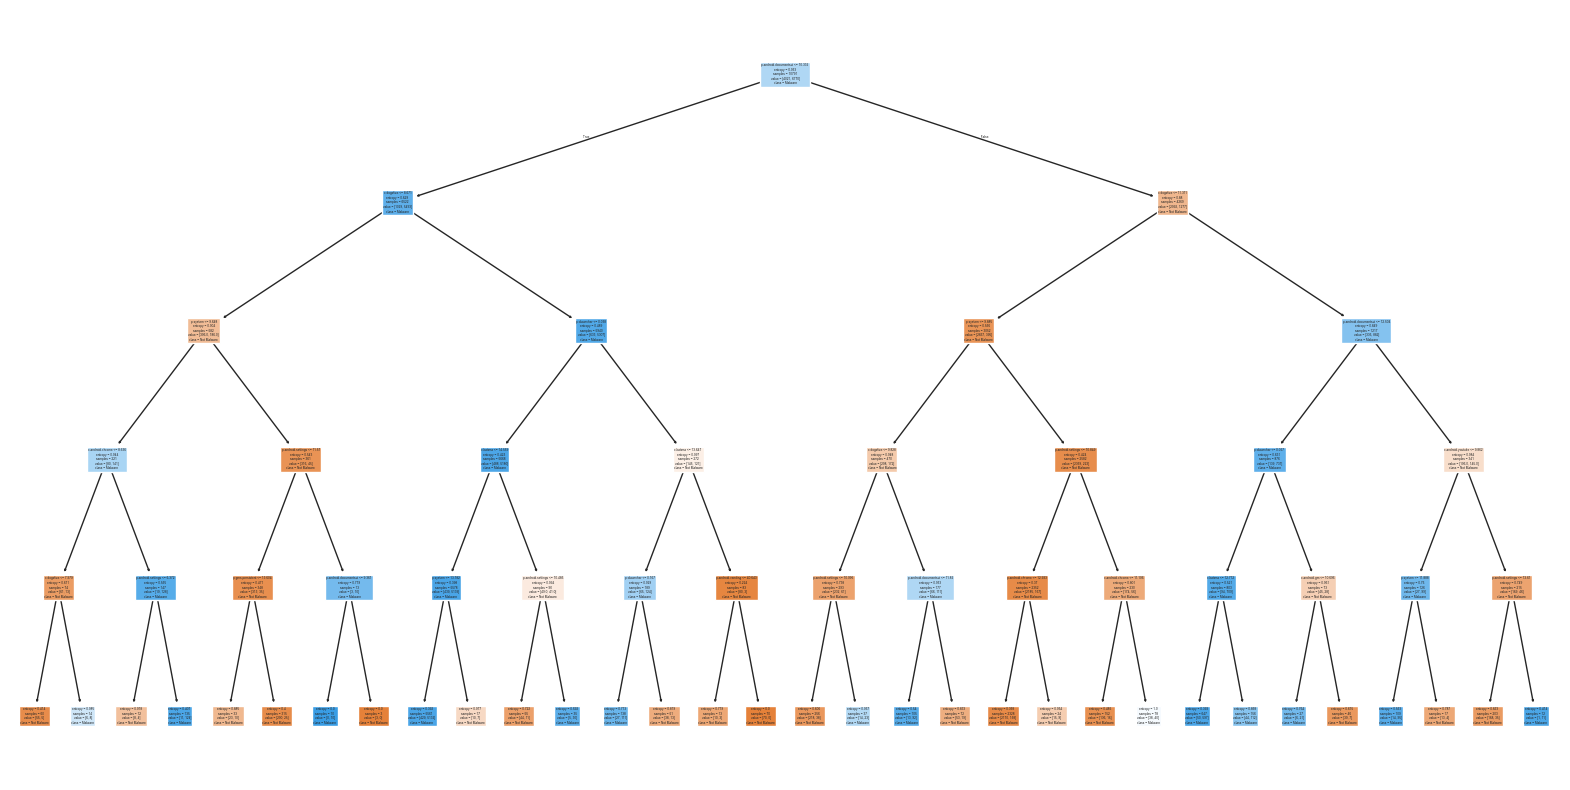

In [18]:
# Визуализация дерева
plt.figure(figsize=(20, 10))  # Устанавливаем размер графика для лучшей видимости
plot_tree(id3_classifier, feature_names=train_data.columns, class_names=['Not Malware', 'Malware'], filled=True)
plt.show()


### 3.2 Training and evaluation of machine learning classifiers

#### 3.2.A

Random Forest Classifier

In [19]:
# Создание и обучение Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
random_forest.fit(train_data, train_mwra.values.ravel())

# Предсказание для тестовой выборки
forest_pred = random_forest.predict(test_data)

# Оценка модели Random Forest Classifier
forest_accuracy = accuracy_score(test_mwra, forest_pred)
forest_precision = precision_score(test_mwra, forest_pred, average='binary')
forest_recall = recall_score(test_mwra, forest_pred, average='binary')

print("Random Forest Classifier - Accuracy:", forest_accuracy)
print("Random Forest Classifier - Precision:", forest_precision)
print("Random Forest Classifier - Recall:", forest_recall)

Random Forest Classifier - Accuracy: 0.9158918918918919
Random Forest Classifier - Precision: 0.910510901399284
Random Forest Classifier - Recall: 0.9608516483516484


#### 3.2.C

Visualization of trained rules

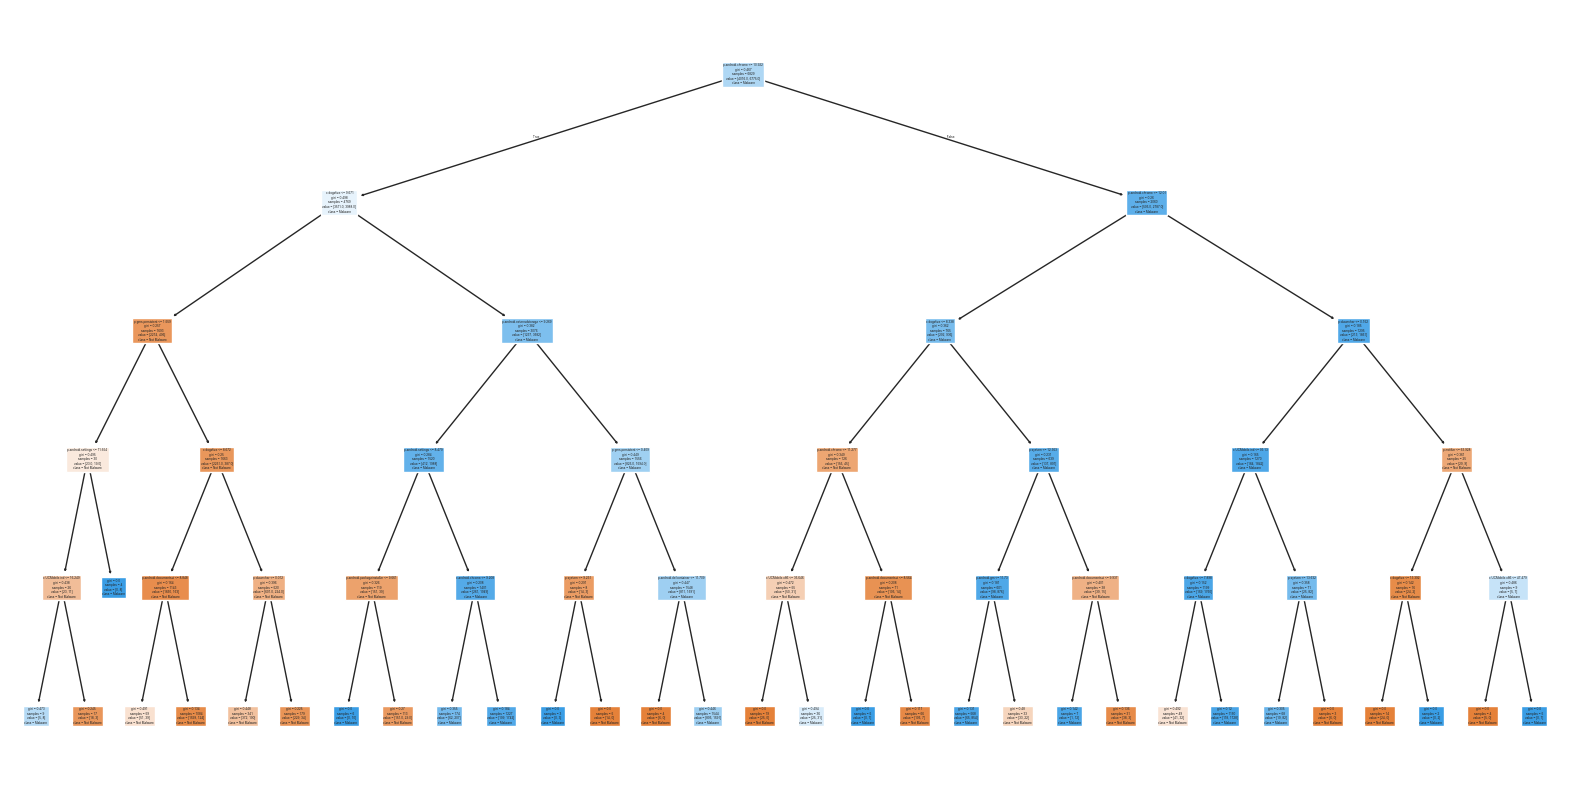

In [20]:
# Визуализация одного из деревьев в Random Forest
plt.figure(figsize=(20, 10))
plot_tree(random_forest.estimators_[0], feature_names=train_data.columns, class_names=['Not Malware', 'Malware'], filled=True)
plt.show()


#### 3.2.B

Support Vector Machine Classifier

In [21]:
# Создание SVM классификатора
svm_classifier = SVC(kernel='rbf', random_state=42)  # Используем RBF ядро для нелинейных границ

# Обучение SVM на тренировочных данных
svm_classifier.fit(train_data, train_mwra.values.ravel())

# Предсказание для тестовых данных
svm_pred = svm_classifier.predict(test_data)

# Оценка модели SVM
svm_accuracy = accuracy_score(test_mwra, svm_pred)
svm_precision = precision_score(test_mwra, svm_pred, average='binary')
svm_recall = recall_score(test_mwra, svm_pred, average='binary')

print("SVM Classifier - Accuracy:", svm_accuracy)
print("SVM Classifier - Precision:", svm_precision)
print("SVM Classifier - Recall:", svm_recall)


SVM Classifier - Accuracy: 0.9065945945945946
SVM Classifier - Precision: 0.8956604977664326
SVM Classifier - Recall: 0.9639423076923077


#### 3.2.D Evaluation of trained models

### 3.3 Optimization aka hyperparameter tuning